# HOUSING PREDICITON------PRICE PREDICTOR

In [1]:
#import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings

In [3]:
housing=pd.read_csv("housing.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()   #On  the basis of this we came to know that no data is missing in any of the column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PITRATIO  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()                 #CHAS is categorical value.

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Histograms.

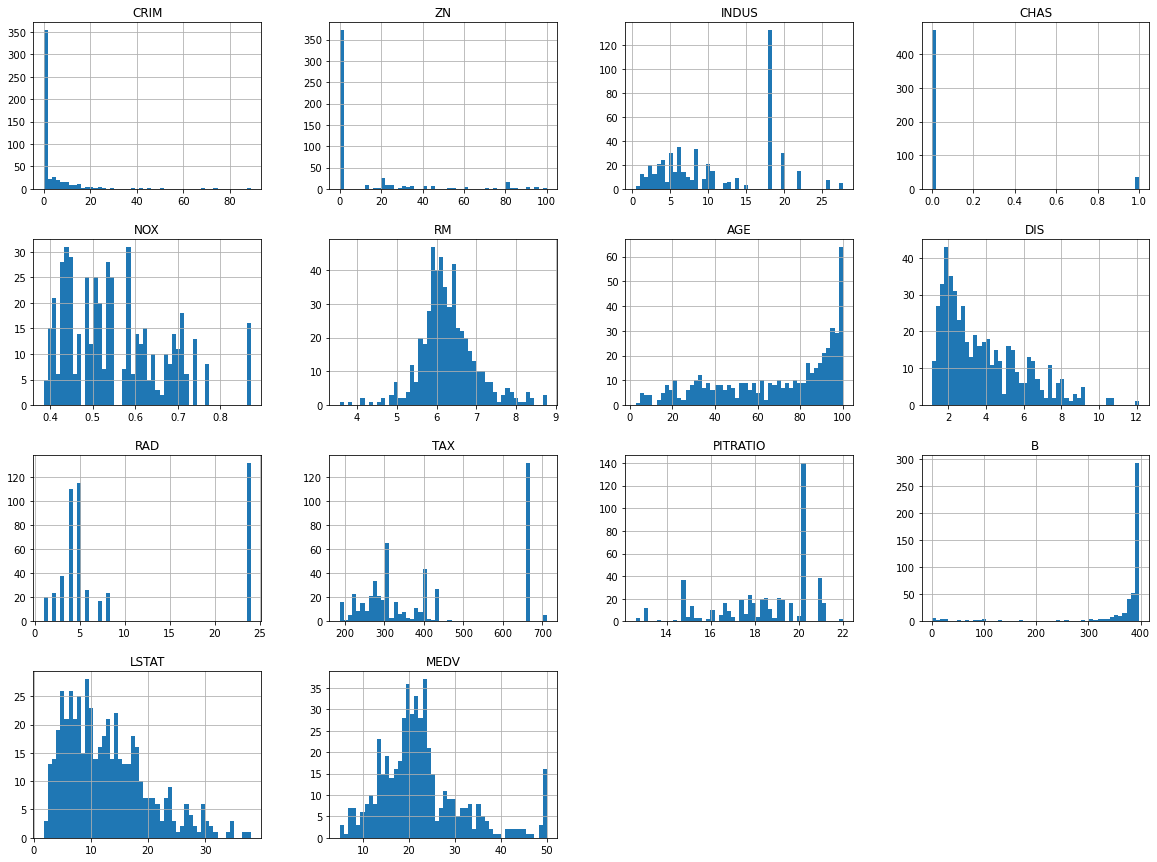

In [9]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
#MEDV..is price which is in $1000....... MEDV is target .....and other 13 columns are features.

In [11]:
#To avoid overfitting we are not going to view more data from this dataset and not going to apply any model on entire data set
#SO to avoid overfitting ...we need to split the dataset in train and test.

# Train_Test_Splitting

In [12]:
from sklearn.model_selection  import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)   #random_state=42....kind of seeding random..
                                                                             #seed means train and test set got locked..no train 
                                                                             #data gonna come into test and vise-versa.

In [13]:
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set:404
Rows in test set: 102



In [14]:
#but still there is a problem...we dont want caterogical features having same kind of values to go to only in test...this will
#mislead our model.....
#so in order to distribute each kind of datapoint in both train and test set....so that model cannot be baised or misleaded...
#we gonna do the follow...we have to introduce .....Stratified Shuffle Split
#suppose CHAS is so important feature for prediction of price...so we have to use this .Stratified Shuffle Split so that its
#values get equally distributed in train and test set.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


In [16]:
strat_train_set                  #SEE CHAS HAVVING BOTH 0 AND 1.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [17]:
strat_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


In [18]:
strat_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [21]:
#so if we divide 376/28
376/28

13.428571428571429

In [22]:
#and 95/7
95/7

13.571428571428571

In [23]:
#so we are getting the same ratio....that is called as  Stratified Shuffle Split.....as it splits 0's and 1's in equal ratio
#to test and train sets...ratio of 13.42 approx...
#this will not mislead our model now....for proper Regression.

In [24]:
#BEFORE CORRELATION....USE TRAIN SET FOR LOOKING INTO CORRELATION....COPY TRAIN SET INTO HOUSING...
#BEACUSE FROM HERE WE NOT GONNA LOOK INTO TEST SET AND ONLY CAN WORK WITH TRAIN SET...
housing=strat_train_set.copy()

# Looking for Correlations

In [25]:
corr_matrix=housing.corr()

In [26]:
corr_matrix['MEDV'].sort_values(ascending=False)              #Works on Karls Person coeff of correlation.

MEDV        1.000000
RM          0.679894
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
PITRATIO   -0.493534
LSTAT      -0.740494
Name: MEDV, dtype: float64

In [27]:
#14*14 gives 196 graphs....nobody is going to analyse this much of graph...so thats why we only gonna plot 
#those ..having postive or negavtive high correlations.

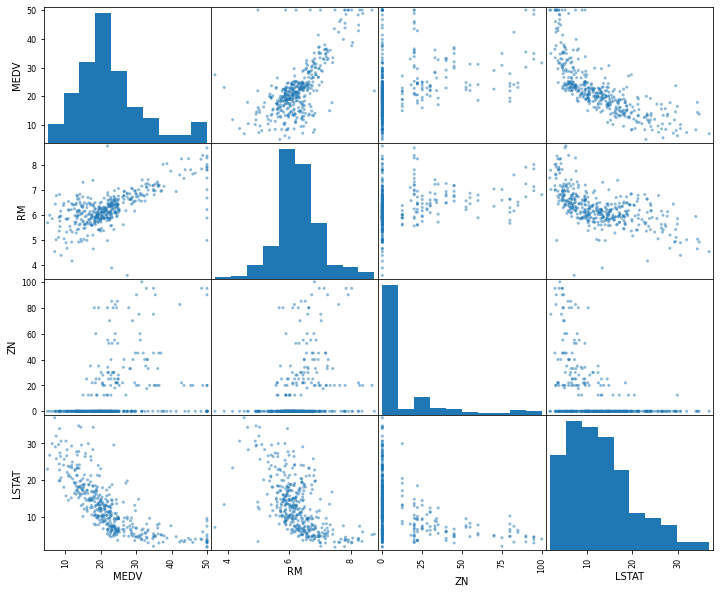

In [28]:
from pandas.plotting import scatter_matrix

#List interested features to find correlations..
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,10))
plt.show()

In [29]:
#Result we can extract is: two things....MEDV AND RM  ,   MEDV AND LSTAT

In [30]:
#NOW IF WE WANT TO GET ENLARGE PLOT OF THESE TWO SCATTER PLOTS...RM Vs. MEDV , LSTAT Vs. MEDV

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

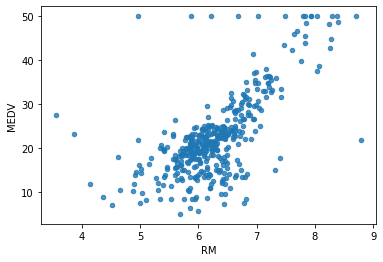

In [31]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)    #alpha : colour darkless.....0.8 dark.....0.2,0.3 light in color.

In [32]:
#WE can remove outliers so that we can get good prediction....outliers not gonna get effect it..
#also...if we can see this graph got capped as 50 in MEDV..and there is a straight line visible..
#but its unusal to thing.....5 RM : 5 room ...having $50000....and 9 RM: having $ 50000....this is not possible...in that case 
#contact to your client and get the proper issue and insight of this happening..

#  Try Out Attributes Combinations

In [33]:
#WE CAN MAKE AN ATTRIBUTE TAX PER ROOM.....WE CAN INSERT NAME COLUMN TO OUR DATAFRAME...TRM : Tax Per Room

In [34]:
housing['TRM']=housing['TAX']/housing['RM']

In [35]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV,TRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [36]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)    

MEDV        1.000000
RM          0.679894
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
PITRATIO   -0.493534
TRM        -0.525160
LSTAT      -0.740494
Name: MEDV, dtype: float64

In [37]:
# WE CAN SEE MEDV HAS VERY HIGHLY NEGATIVE CORRELATION OF TAX RM.....TRM.

<AxesSubplot:xlabel='TRM', ylabel='MEDV'>

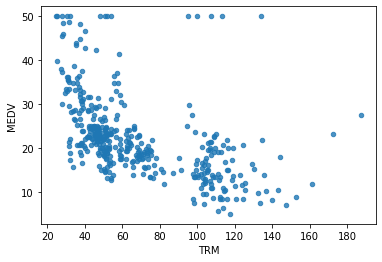

In [38]:
housing.plot(kind='scatter',x='TRM',y='MEDV',alpha=0.8)

In [39]:
housing=strat_train_set.drop("MEDV",axis=1)            #features 
housing_labels=strat_train_set["MEDV"].copy()          # label/target for us is price MEDV.

# SELECTING A DESIRED MODEL FOR PREDICITON OF PRICE.

# 1. LINEAR REGRESSION

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing,housing_labels)     

LinearRegression()

In [41]:
some_data=housing.iloc[0:5]
some_labels=housing_labels.iloc[:5]
prepared_data=some_data
model.predict(prepared_data) 

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [42]:
list(some_labels) 

[21.9, 24.5, 16.7, 23.1, 23.0]

In [43]:
#Evaluating the model
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing)
lin_mse=mean_squared_error(housing_labels,housing_predicitons)
lin_rmse= np.sqrt(lin_mse)

In [44]:
lin_rmse    # getting high error with it....not acceptable....

4.829321492635759

In [45]:
#USING CROSS VALIDATION..

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing, housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
rmse_scores         

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [47]:
# USING THESE SCORES ,WE FIND MEAN, SD, WE CREATE A FUNCTION FOR IT.

def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())
    

In [48]:
print_scores(rmse_scores)

Scores [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Mean 5.030437102767304
Standard Deviation 1.060766115829481


# 2. DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(housing,housing_labels)   

DecisionTreeRegressor()

In [50]:
some_data=housing.iloc[0:5]
some_labels=housing_labels.iloc[:5]
prepared_data=some_data
model.predict(prepared_data) 

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [51]:
list(some_labels)    # This is over fitting as we are getting predicted and actual values same...so to overcome this 
                     # we gonna use cross validation...


[21.9, 24.5, 16.7, 23.1, 23.0]

In [52]:
#Evaluating the model
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing)
lin_mse=mean_squared_error(housing_labels,housing_predicitons)
lin_rmse= np.sqrt(lin_mse)

In [53]:
lin_rmse  # this is overfitting ...we need to get rid of it...use cross validation

0.0

In [54]:
#USING CROSS VALIDATION..

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing, housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [55]:
rmse_scores

array([3.96102968, 5.59607877, 5.50841928, 3.91498061, 4.03227603,
       3.03521004, 6.88418477, 3.77657252, 3.29814342, 3.87579024])

In [56]:
# USING THESE SCORES ,WE FIND MEAN, SD, WE CREATE A FUNCTION FOR IT.

def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

In [57]:
print_scores(rmse_scores)

Scores [3.96102968 5.59607877 5.50841928 3.91498061 4.03227603 3.03521004
 6.88418477 3.77657252 3.29814342 3.87579024]
Mean 4.3882685356262625
Standard Deviation 1.1459647616058237


# 3. RANDOM FOREST REGRESSOR

In [58]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing,housing_labels) 

RandomForestRegressor()

In [59]:
some_data=housing.iloc[0:5]
some_labels=housing_labels.iloc[:5]
prepared_data=some_data
model.predict(prepared_data) 

array([22.4  , 25.391, 16.59 , 23.537, 23.754])

In [60]:
list(some_labels)    # This is over fitting as we are getting predicted and actual values same...so to overcome this 
                     # we gonna use cross validation...


[21.9, 24.5, 16.7, 23.1, 23.0]

In [61]:
#Evaluating the model
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing)
lin_mse=mean_squared_error(housing_labels,housing_predicitons)
lin_rmse= np.sqrt(lin_mse)

In [62]:
lin_rmse

1.152192880193379

In [63]:
#USING CROSS VALIDATION..

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing, housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [64]:
rmse_scores

array([2.91474292, 2.60525197, 4.49170799, 2.7069737 , 3.43931086,
       2.51450303, 4.66245407, 3.33093859, 2.92840779, 3.1964918 ])

In [65]:
# USING THESE SCORES ,WE FIND MEAN, SD, WE CREATE A FUNCTION FOR IT.

def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

In [66]:
print_scores(rmse_scores)

Scores [2.91474292 2.60525197 4.49170799 2.7069737  3.43931086 2.51450303
 4.66245407 3.33093859 2.92840779 3.1964918 ]
Mean 3.2790782712058424
Standard Deviation 0.7100010425281535


In [67]:
# Random forest gives lin_rmse less and also in cross validation it gives less error...
#so we gonna opt random forest most probably.

In [181]:
# OUTPUT FROM DIFFERENT MODELS.
# 1.LINEAR REGRESSION:
#             Mean :  5.030437102767304
 #           Standard Deviation :1.060766115829481  


# 2.DECISION TREE MODEL:
#             Mean :   4.214246929989794  
#             Standard Deviation : 1.1459647616058237 

# 3.RANDOM FOREST REGRESSION:
#             Mean :   3.3684451255436514
#             Standard Deviation: 0.7252786049924188


In [69]:
# ON COMPRAING WE GET AN INSIGHT THAT, RANDOM FOREST WORKS THE BEST.....SO WE NOW SAVE THE MODEL FOR...ORIGINAL.BOSTON.joblib.

# SAVING THE MODEL IN A FILE.

In [70]:
from joblib import dump,load
dump(model, "Original_Boston.joblib")

['Original_Boston.joblib']

In [71]:
#Testing the data ,by applying model

In [72]:
# split into feature and label.
x1_test=strat_test_set.drop("MEDV",axis=1)
y1_test=strat_test_set["MEDV"].copy()

In [73]:
x1_test_prepared=x1_test

In [74]:
final_prediction1=model.predict(x1_test_prepared)

In [75]:
final_mse=mean_squared_error(final_prediction1,y1_test)

In [76]:
final_rmse1=np.sqrt(final_mse)

In [77]:
final_rmse1

2.957619848233822

In [78]:
print("final_prediction for original dataset of boston housing:\n",list(final_prediction1))
print("\n----------------------------------------------------------------------------------------------------------")
print("Y_test Values Actual 20% MEDV values:\n",list(y1_test))


final_prediction for original dataset of boston housing:
 [24.644999999999996, 11.783000000000001, 25.421000000000014, 21.503000000000007, 17.993999999999986, 14.931999999999992, 19.898000000000003, 14.723000000000003, 32.101, 42.225000000000016, 19.460000000000004, 11.540999999999995, 23.791999999999998, 28.518999999999995, 19.546000000000003, 11.186999999999998, 31.607, 14.173, 23.755999999999986, 18.664999999999996, 19.959999999999983, 17.951000000000004, 17.93, 21.934999999999995, 18.189999999999998, 31.241000000000007, 15.698000000000004, 32.245999999999995, 8.463999999999999, 33.400999999999996, 24.00799999999999, 21.478000000000005, 22.77799999999999, 10.955999999999994, 20.324999999999985, 11.20299999999999, 43.66800000000003, 24.45899999999999, 23.38600000000001, 41.14800000000003, 24.13500000000001, 30.043000000000006, 20.462000000000007, 20.760000000000005, 19.661999999999992, 33.123999999999995, 44.934000000000054, 20.073999999999995, 20.212999999999994, 21.826999999999998,

In [79]:
final_prediction1.shape

(102,)

In [80]:
y1_test.shape

(102,)

In [81]:

# WE HAVE SAVED THE MODEL IN FILE...['Original_Boston.joblib']..
# AND IN NEW JUPYTER NOTEBOOK NAME MODEL USAGE....AND DO FURTHER PROCESS IN IT.

# --------------------------------------------------------------------------------------------------------------

# NOW FOR ANOTHER CASE....WHEN VALUES ARE MISSING....STEPS ARE AS BELOW...

# ---------------------------------------------------------------------------------------------------------------

# MISSING ATTRIBUTES

In [82]:
#IMPORT NECESSARY LIBRARIES IF NOT IMPORTED.

In [83]:
# TILL NOW OUR DATASET HAS NO NAN VALUES WE FOUND....BUT AS IF THERE ARE SOME NULL VALUES ARE THERE IN OUR DATASET...THAN WHAT 
#MUST BE THE APPROACH TO FIX IT...LETS SEE..


#housing the original  dataset...

#TO TAKE CARE OF MISSING ATTRIBUTES,YOU HAVE THREE OPTIONS...
#  1. GET RID OF THE MISSING DATA POINTS.
#  2. GET RID OF THE WHOLE ATTRIBUTE.
#  3. GET THE VALUE TO SOME VALUE (0,mean or median)



# OPTIONS 1:

#  a=housing.dropna(subset=["RM"])    # This statement won't change the original housing dataset until,we write ,Inplace="True".
#  a.shape     O/D : (501,15)     if 4 data where missing from RM column.


#OPTION 2:

# housing.drop("RM",axis=1)
# housing.drop("RM",axis=1).shape


#OPTION 3:

# median=housing["RM"].median()
# median          O/D : 6.027
# housing["RM"].fillna(median)    O/D : RM will have 505 filled cells.

#housing.shape      O/D: (505,15)
#-----------------------------------------------------------------------------------------------------------------------------#



# NOTE: THIS TASK SEEMS SO TEDIOUS TO DO FOR EACH COLUMN....SO Sklearn HAVE A CLASS NAME IMPUTER..
# IMPUTER GONNA FILL ALL THE EMPTY CELLS IN RESPECTIVE COLUMN ACCORDING TO THE GIVEN MODE....MEDIAN IF GIVEN ...IT WILL 
# FILL THE RESPECTIVE MEDIAN TO EACH COLUMN....



# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(strategy="median")
# imputer.fit(housing)
# we will ask the imputer to show all the median of each column,in housing and will look it by statistics_
# imputer.statistics_                          To confirm we have median of all columns
# imputer.statistics_.shape

#NOTE: SO WE WILL MAKE OUR PIPELINE AUTOMATE IN SUCH A WAY,IF THERE IS ANY MISSING VALUE THEN THAT WILL BE FILLED UP BY THAT
#      MEDIAN.

# X=imputer.transform(housing)
# housing_tr=pd.DataFrame(X,columns=housing.columns)

# housing_tr.describe()


# CREATING A PIPELINE..............................when missing attributes...and have performed the above.

In [84]:
#from sklearn.pipeline import Pipeline

In [85]:
# FEATURE SCALING:

#What is meant by feature scaling?
# ANS: Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 
# It is performed during the data pre-processing to handle highly varying magnitudes or values or units.
# Feature scaling is essential for machine learning algorithms that calculate distances between data. ... 
# Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately 
# to the final distance.

#-------------------------------------------------------------------------------------------------------------------------------
#TWO OF THE FEATURE SCALING METHODS:
# 1. NORMALIZATION:
#    (min-max)/(max-min)------> values comes into 0 to 1.
#  sklearn provides a class called MinMaxScaler for this.


# 2. Standardization
#    (value-mean)/std..... ie. Standardized value = X – μ / σ
#  sklearn provides a class called Standard Scaler for this.
#-------------------------------------------------------------------------------------------------------------------------------

#✨ STANDARDIZATION WILL WORK EXCELLENT...BECAUSE AS IF WE FORGETTEN TO INCLUDE SOME VALUE THEN THAT GONNA CHANGE OR EFFECT 
# MIN/MAX VALUE,SO OPTION 1 WILL BE AFFECTED.

#WHEREAS, Z=X – μ / σ , THIS INCLUDES μ , σ , X  WON'T GET AFFECTED DRASTICALLY,SO BECAUSE OF THAT ,ITS GOOD TO OPT 2 OVER 1.


# THEREFORE WE WILL USE STANDARD SCALER.

In [86]:
#from sklearn.preprocessing import StandardScaler
#my_pipeline=Pipeline([(imputer,SimpleImputer(strategy="median")),("std_scaler",StandardScaler())])
# housing_num_tr=my_pipeline.fit_transform(housing_tr)
# housing_num_tr     # rhis came to be a numpy array

# LETS PERFORM....ABOVE STEPS FOR SAME DATASET BUT HAVING SOME MISSING VALUES.

In [87]:
hou=pd.read_csv("housing_mv.csv")

In [88]:
hou.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,NaN,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [89]:
hou.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273,21.0,396.90,7.88,11.9


In [90]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      502 non-null    float64
 1   ZN        505 non-null    float64
 2   INDUS     504 non-null    float64
 3   CHAS      505 non-null    float64
 4   NOX       501 non-null    float64
 5   RM        500 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       499 non-null    float64
 8   RAD       505 non-null    float64
 9   TAX       506 non-null    int64  
 10  PITRATIO  502 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     504 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [91]:
# so we have so many attributes having missing values....so we are ready to use above steps....of imputer to it.

In [92]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(hou)
# we will ask the imputer to show all the median of each column,in hou and will look it by statistics_

SimpleImputer(strategy='median')

In [93]:
imputer.statistics_

array([2.6042e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.2100e+00, 7.7500e+01, 3.1992e+00, 5.0000e+00, 3.3000e+02,
       1.9100e+01, 3.9144e+02, 1.1395e+01, 2.1200e+01])

In [94]:
imputer.statistics_                          #To confirm we have median of all columns
imputer.statistics_.shape

(14,)

In [95]:
X=imputer.transform(hou)                         # respective median got fitted to each columnn...ie. hou got transformed.
X                                  #as data comes in array form...make it structured..by making dataframe of it so next....

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [96]:
housing_tr=pd.DataFrame(X,columns=hou.columns)
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.210,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [97]:
housing_tr.describe()    #Now we have housing_tr .....name dataframe having all the filled value......hou was still our 
                                                                                                      #orginal dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.609555,11.363636,11.159190,0.069170,0.554067,6.285079,68.574901,3.786375,9.551383,408.237154,18.470553,356.674032,12.668043,22.532806
std,8.602381,23.322453,6.845307,0.253994,0.114623,0.701333,28.148861,2.091501,8.706111,168.537116,2.156276,91.294864,7.132979,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.104425,4.000000,279.000000,17.400000,375.377500,7.037500,17.025000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.199200,5.000000,330.000000,19.100000,391.440000,11.395000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.117675,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
# now as we have all the values....we want to make CHAS , TAX , RAD int64.....for all data train and test..
housing_tr['CHAS']=housing_tr['CHAS'].astype('int64')
housing_tr['RAD']=housing_tr['RAD'].astype('int64')
housing_tr['TAX']=housing_tr['TAX'].astype('int64')

In [99]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PITRATIO  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# ONCE WE GET ALL FILLED VALUES...NOW ITS TIME TO  DIVIDE DATASET INTO TRAIN AND TEST SETS...
# FILLED VALUES DATAFRAME IS: housing_tr

In [100]:
from sklearn.model_selection  import train_test_split
train1_set,test1_set=train_test_split(housing_tr,test_size=0.2,random_state=42)

In [101]:
print(f"Rows in train1 set:{len(train1_set)}\nRows in test1 set: {len(test1_set)}\n")

Rows in train1 set:404
Rows in test1 set: 102



In [102]:
from sklearn.model_selection import StratifiedShuffleSplit

split1=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train1_index,test1_index in split1.split(housing_tr,housing_tr['CHAS']):
    strat_train1_set=housing_tr.loc[train1_index]
    strat_test1_set=housing_tr.loc[test1_index]


In [103]:
strat_train1_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [104]:
strat_train1_set.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
216,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3


In [105]:
strat_train1_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      404 non-null    float64
 1   ZN        404 non-null    float64
 2   INDUS     404 non-null    float64
 3   CHAS      404 non-null    int64  
 4   NOX       404 non-null    float64
 5   RM        404 non-null    float64
 6   AGE       404 non-null    float64
 7   DIS       404 non-null    float64
 8   RAD       404 non-null    int64  
 9   TAX       404 non-null    int64  
 10  PITRATIO  404 non-null    float64
 11  B         404 non-null    float64
 12  LSTAT     404 non-null    float64
 13  MEDV      404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [106]:
housing_tr=strat_train1_set.copy()    # Make a copy of training set on housing_tr.

In [107]:
housing_tr.info()                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      404 non-null    float64
 1   ZN        404 non-null    float64
 2   INDUS     404 non-null    float64
 3   CHAS      404 non-null    int64  
 4   NOX       404 non-null    float64
 5   RM        404 non-null    float64
 6   AGE       404 non-null    float64
 7   DIS       404 non-null    float64
 8   RAD       404 non-null    int64  
 9   TAX       404 non-null    int64  
 10  PITRATIO  404 non-null    float64
 11  B         404 non-null    float64
 12  LSTAT     404 non-null    float64
 13  MEDV      404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [108]:
# REMOVING THE LABEL FROM MAIN DATASET....
housing_tr=strat_train_set.drop("MEDV",axis=1)            #features 
housing_tr_labels=strat_train_set["MEDV"].copy()          # label/target for us is price MEDV

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),("std_scaler",StandardScaler())])
housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr     # This came to be a numpy array

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [112]:
housing_num_tr.shape      #this contain only training set.

(404, 13)

In [113]:
housing_tr.head()       #independent of MEDV

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


# SELECTING A DESIRED MODEL FOR PREDICITON OF PRICE.

# 1.LINEAR REGRESSION MODEL

In [114]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_num_tr,housing_tr_labels)     

LinearRegression()

In [115]:
some_data_tr=housing_tr.iloc[0:5]

In [116]:
some_labels=housing_tr_labels.iloc[:5]

In [117]:
prepared_data=my_pipeline.transform(some_data_tr)

In [118]:
model.predict(prepared_data)      # predicted price

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [119]:
list(some_labels)                # actucal price in test set.

[21.9, 24.5, 16.7, 23.1, 23.0]

In [120]:
# these are corresponding values we get.....some_label values are actucal Y_train values....ie. price in train...and prep data
# predicted values of price for the same price .

In [121]:
# for 21.9-----> got 23.94996893,
# for 24.5-----> got  27.21690623.... ...  for23.0 ---> 23.76177838...this is good.

In [122]:
#NOW LETS FIND RMSE VALUES......FOR ACCURACY.

# EVALUATING THE MODEL

In [123]:
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_tr_labels,housing_predicitons)
lin_rmse= np.sqrt(lin_mse)

In [124]:
lin_mse  # Linear Regression's mean squared error.

23.322346079233675

In [125]:
lin_rmse  # Linear Regression's root mean squared error.

4.829321492635759

# USE BETTER EVALUATION TECHNIQUE----CROSS VALIDATION.

In [126]:
#USING CROSS VALIDATION..

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr, housing_tr_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [127]:
rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [128]:
#NOTE: WE CANNOT BEAR THIS MUCH DIFFERNECE IN ACTUAL AND PREDICTED ONE.
# ...THEREFORE, WE WILL DISCARD THIS MODEL...THAT IS WE WILL DISCARD lINEAR REGRESSION MODEL

In [129]:
# USING THESE SCORES ,WE FIND MEAN, SD, WE CREATE A FUNCTION FOR IT.

def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())
    

In [130]:
print_scores(rmse_scores)

Scores [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Mean 5.030437102767305
Standard Deviation 1.0607661158294834


# 2. DECISION TREE MODEL

In [131]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_tr_labels)  

DecisionTreeRegressor()

In [132]:
some_data_tr=housing_tr.iloc[0:5]
some_labels=housing_tr_labels.iloc[:5]

In [133]:
prepared_data=my_pipeline.transform(some_data_tr)

In [134]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [135]:
list(some_labels)        

[21.9, 24.5, 16.7, 23.1, 23.0]

In [136]:
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_tr_labels,housing_predicitons)
lin_rmse= np.sqrt(lin_mse)

In [137]:
lin_rmse

0.0

# USE BETTER EVALUATION TECHNIQUE----CROSS VALIDATION.

In [138]:
# which is wrong and our model has been overfitted here.....thats why its showing zero error.
# we are interested yo make the system learn about the trend out of the given dataset..and not at all in getting errorless,
# but over fitted data.

In [139]:
#what is overfitting?
# When our system learned from noise.

In [140]:
# NOTE: DO NOT TOUCH OUR TEST SET UNLESS OR UNTIL,WE ARE AT THAT STAGE THAT WE GOT BESTMODEL.

In [141]:
#NOW THE QUESTION ARISES,HOW TO GET RID OF THIS OVERFITTING ISSUE....SO WE HAVE TO USE CROSS VALIDATION.

In [142]:
#USING CROSS VALIDATION..

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr, housing_tr_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [143]:
rmse_scores

array([3.86207325, 5.7415261 , 5.46521149, 3.85230371, 4.095058  ,
       3.7222641 , 5.05507171, 3.75283226, 3.42728026, 3.82348009])

In [144]:
# USING THESE SCORES ,WE FIND MEAN, SD, WE CREATE A FUNCTION FOR IT.

def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())

In [145]:
print_scores(rmse_scores)

Scores [3.86207325 5.7415261  5.46521149 3.85230371 4.095058   3.7222641
 5.05507171 3.75283226 3.42728026 3.82348009]
Mean 4.279710096542766
Standard Deviation 0.7783204411179946


In [146]:
# This has removed the overfitting of data..and we are not getting zero error which is a good sign.
# NOTE: FROM THIS ERROR WE GOT FROM rmse_scores.

#NOW ALSO APPLY THIS CROSS VALIDATION TO LINEAR REGRESSION ALSO.

In [147]:
#                USING CROSS VALIDATION WE GOT THE OUTPUT FOR BOTH THE MODEL
#  ERRORS WE ARE GETTING FROM LINEAR REGRESSION:
# array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

#  ERRORS WE ARE GETTING FROM DECISION TREE MODEL:
#array([3.93154844, 5.65724228, 5.45531739, 3.83927076, 3.90134592,2.88911751, 5.01796772, 3.87533869, 3.32061741, 4.37187031])

In [148]:
# NOTE THAT DECISION TREE MODEL IS BETTER THEN LINEAR REGRESSION MODEL.

# 3. RANDOM FOREST REGRESSOR

In [149]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_tr_labels) 

RandomForestRegressor()

In [150]:
some_data_tr=housing_tr.iloc[0:5]
some_labels=housing_tr_labels.iloc[:5]

In [151]:
prepared_data=my_pipeline.transform(some_data_tr)

In [152]:
model.predict(prepared_data)

array([22.295, 25.333, 16.902, 23.352, 23.505])

In [153]:
prepared_data[3]

array([-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
        0.13494109, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
        0.52982668,  0.45343469, -0.81939807])

In [154]:
list(some_labels)  # training set's labels these are ...we havnot yet, look into test set.

[21.9, 24.5, 16.7, 23.1, 23.0]

In [155]:
from sklearn.metrics import mean_squared_error
housing_predicitons = model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_tr_labels,housing_predicitons)
lin_rmse= np.sqrt(lin_mse)

In [156]:
lin_rmse

1.212296499203143

# USE BETTER EVALUATION TECHNIQUE----CROSS VALIDATION.

In [157]:
#USING CROSS VALIDATION..

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr, housing_tr_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [158]:
rmse_scores

array([2.85568422, 2.77616637, 4.43268523, 2.54679293, 3.57396021,
       2.64900323, 4.4151531 , 3.38548502, 3.00380758, 3.21789557])

In [159]:
#                USING CROSS VALIDATION WE GOT THE OUTPUT FOR BOTH THE MODEL
#  ERRORS WE ARE GETTING FROM LINEAR REGRESSION:
# array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

#  ERRORS WE ARE GETTING FROM DECISION TREE MODEL:
#array([3.93154844, 5.65724228, 5.45531739, 3.83927076, 3.90134592,2.88911751, 5.01796772, 3.87533869, 3.32061741, 4.37187031])


#  ERRORS WE ARE GETTING FROM  RANDOM FOREST MODEL:
# array([2.81927693, 2.91132204, 4.41910429, 2.67999518, 3.25681651,2.75332403, 5.07081862, 3.37298847, 3.39443502, 3.18083311])


In [160]:
# NOTE: OUT OF THESE ALL 3 , RANDOM FOREST GAVE US THE LEAST ERROR VALUE...MEANS THIS IS PROVEN TO BE BEST MODEL.

In [161]:
# USING THESE SCORES ,WE FIND MEAN, SD, WE CREATE A FUNCTION FOR IT.

def print_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())
    

In [162]:
print_scores(rmse_scores)

Scores [2.85568422 2.77616637 4.43268523 2.54679293 3.57396021 2.64900323
 4.4151531  3.38548502 3.00380758 3.21789557]
Mean 3.285663347235675
Standard Deviation 0.6453104460666886


In [163]:
# OUTPUT FROM DIFFERENT MODELS.
# 1.LINEAR REGRESSION:
#             Mean :     5.030437102767305
#             Standard Deviation :  1.0607661158294834


# 2.DECISION TREE MODEL:
#             Mean :     4.2220028640157
#             Standard Deviation :  0.97368315658327

# 3.RANDOM FOREST REGRESSION:
#             Mean :     3.3220463932872057
#             Standard Deviation:   0.6350413601806926

In [164]:
# SO AS SD IS LEAST IN RANDOM FOREST..MEANS ERROR IS LEAST....IMPLES PREDICTION WILL BE GOOD.

# SAVING THE MODEL IN A FILE..

In [165]:
model

RandomForestRegressor()

In [166]:
from joblib import dump,load
dump(model, "Boston.joblib")

['Boston.joblib']

# TESTING THE MODEL ON TEST DATA

In [167]:
strat_test1_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


In [168]:
# split into feature and label.
x_test=strat_test1_set.drop("MEDV",axis=1)
y_test=strat_test1_set["MEDV"].copy()

In [169]:
x_test_prepared=my_pipeline.transform(x_test)

In [170]:
model    # means random forest regressor is working here.

RandomForestRegressor()

In [171]:
final_prediction=model.predict(x_test_prepared)   #model got applied on test data on all featues..
                                                  #and value of price got predicted and stored into final_prediction variable.

In [172]:
# comparision between this predicted and actucal store value in y_test.
final_mse=mean_squared_error(final_prediction,y_test)

In [173]:
final_rmse=np.sqrt(final_mse)

In [174]:
final_rmse

2.9977378906075653

In [175]:
print("final_prediction:\n",list(final_prediction))
print("\n----------------------------------------------------------------------------------------------------------")
print("Y_test Values Actual 20% MEDV values:\n",list(y_test))

final_prediction:
 [25.443000000000005, 11.710999999999997, 26.084999999999994, 22.153000000000006, 18.486999999999995, 15.006999999999998, 20.107999999999993, 14.408999999999997, 31.832000000000008, 41.172999999999995, 19.563000000000002, 11.665999999999991, 24.342999999999993, 26.768999999999995, 19.55, 11.038999999999994, 31.43799999999999, 14.693999999999996, 23.501999999999995, 18.592, 20.33499999999999, 17.817999999999998, 16.675999999999995, 22.189, 18.442999999999987, 31.136000000000003, 16.831999999999997, 32.57699999999999, 9.291, 32.86699999999999, 23.693999999999992, 20.973999999999993, 22.692999999999984, 11.060999999999993, 20.964999999999986, 11.510999999999997, 43.13300000000003, 24.39900000000001, 23.60099999999998, 42.396000000000015, 23.782999999999998, 30.007999999999985, 20.31800000000001, 21.082000000000004, 18.767999999999986, 33.545999999999985, 43.623000000000026, 20.141999999999996, 19.949999999999992, 21.89599999999998, 21.01899999999999, 14.596000000000004, 

In [176]:
final_prediction.shape

(102,)

In [177]:
y_test.shape

(102,)

In [178]:
# compare the correspong values....of final_prediction and y_test for insights.

In [179]:
# WE HAVE SAVED THE MODEL IN FILE...['Boston.joblib']..
# AND IN NEW JUPYTER NOTEBOOK NAME MODEL USAGE....AND DO FURTHER PROCESS IN IT.

# ---------------------------------------------------------------------------------------------------------------

In [180]:
#NOTE: SO IN BOTH THE CASES....WHEN WE ARE GIVEN WITH PROPER FILLED DATASET .....AND WHEN WE ARE GIVEN WITH DATASET HAVING 
#      NULL VALUES ,IN BOTH THE CASES WE ARE GETTING....ALMOST FAIR PRICE PREDICITON..ACCORDING TO THE FEATURES...
        
      # CHECK THE RESULT OF PREDICTION OF PRICE (MEDV) IN PYTHON FILE...NAMED..
      # 1.FOR ORIGINAL BOSTON SET:  NOTEBOOK IS : Original_Boston.joblib
      # 2.FOR DATASET HAVING NULL VALUES : NOTEBOOK IS : Boston.joblib

# ---------------------------------------------------------------------------------------------------------------